In [4]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv("wiki_movie_plots_deduped.csv", delimiter=',')
data.head(10)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab..."
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....


In [5]:
data.shape

(34886, 8)

In [8]:
data.dtypes

Release Year         int64
Title               object
Origin/Ethnicity    object
Director            object
Cast                object
Genre               object
Wiki Page           object
Plot                object
dtype: object

In [9]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.Plot, data.Genre, test_size=0.2, random_state=0)

# make the pipeline
text_pipe = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [10]:
# types of genre avaialable to display
text_pipe.fit(data.Plot, data.Genre);
print(text_pipe.named_steps['clf'].classes_)

[' ' ' usa ' ' usa, can ' ... 'yuen lai-kei' 'zombie comedy'
 'zombie horror']


In [11]:
# for each genre type display 10 features with the biggest classification weights
feature_names = text_pipe.named_steps['vect'].get_feature_names()
classifier_weights = text_pipe.named_steps['clf'].coef_
classifier_classes = text_pipe.named_steps['clf'].classes_

for i, genre in enumerate(classifier_classes):
    top10 = np.argsort(-classifier_weights[i])[:10]
    print(genre)
    print([feature_names[j] for j in top10])

 
['karan', 'mahek', 'suraj', 'om', 'indrajeet', 'kapoor', 'jeet', 'tehzeeb', 'viren', 'bhaskar']
 usa 
['clyde', 'jimmy', 'speedway', 'chilblain', 'mellie', 'joe', 'heist', 'tube', 'pneumatic', 'bobbie']
 usa, can 
['beatriz', 'doug', 'kathy', 'dinner', 'jeana', 'grant', 'tow', 'tells', 'massage', 'tara']
-
['krishnendu', 'nandalal', 'udit', 'gauri', 'jhind', 'king', 'amulya', 'shankar', 'mrinmoyee', 'jewels']
16 mm film
['women', 'radio', 'honey', 'ragazza', 'isabel', 'hurst', 'hilary', 'norris', 'suspiciously', 'stations']
[140]
['sargavedi', 'nadan', 'devadas', 'mighty', 'revival', 'sustained', 'jayaram', 'narrative', 'artists', 'crux']
[144]
['jayakrishnan', 'parthipan', 'rima', 'shikha', 'uganda', 'boutique', 'local', 'jail', 'indiatimes2', 'tranquillity']
action
['police', 'kill', 'gang', 'killed', 'father', 'man', 'men', 'brother', 'kills', 'family']
action 
['raja', 'pugazh', 'udhay', 'jp', 'guru', 'devasena', 'sarathy', 'chennai', 'kutty', 'ravi']
action & comedy
['jayaraj', 

action, adventure
['dom', 'superman', 'xander', 'zatoichi', 'zod', 'cipher', 'xiang', 'yojimbo', 'mccullen', 'hannibal']
action, adventure, comedy
['eggsy', 'poppy', 'kingsman', 'harry', 'statesman', 'whiskey', 'antidote', 'tilde', 'merlin', 'charlie']
action, adventure, comedy, drama, science fiction, musical, fantasy
['arun', 'mogambo', 'seema', 'device', 'calendar', 'india', 'invisible', 'children', 'jugal', 'wearer']
action, adventure, crime
['ashok', 'nishikant', 'chotu', 'shah', 'village', 'men', 'sidique', 'haridaspur', 'incidences', 'choudary']
action, adventure, crime, sci-fi
['killian', 'kuze', 'hanka', 'ouelet', 'aramaki', 'cutter', 'batou', 'motoko', 'togusa', 'section']
action, adventure, drama, fantasy
['okja', 'mija', 'mirando', 'alf', 'jay', 'pig', 'corporation', 'nancy', 'super', 'slaughterhouse']
action, adventure, drama, musical, family
['kishen', 'vidyanath', 'karan', 'hussein', 'anuradha', 'ranjit', 'lucy', 'chutkiram', 'durga', 'geeta']
action, adventure, drama, r

action, sci-fi, mecha
['kyo', 'shizuno', 'gards', 'celebrum', 'maihama', 'deutera', 'promo', 'sogoru', 'orm', 'misaki']
action, sci-fi, mecha, spy
['evolved', 'rabbits', 'frontier', 'cutting', 'edge', 'alien', 'wulgaru', 'mjpep', 'mjp', 'ahsmb']
action, sci-fi, thriller
['dekkom', 'palma', 'icss', 'max', 'jake', 'satellites', 'satellite', 'geostorm', 'reboot', 'dutch']
action, science fiction
['gamera', 'barb', 'emilie', 'mccomb', 'gyaos', 'nantz', 'tillman', 'spock', 'carter', 'jiger']
action, science fiction, thriller
['skif', 'gudvin', 'emergency', 'beacon', 'pan', 'asian', 'russia', 'belyj', 'anastasiya', 'azis']
action, sports, romance
['aryan', 'ranjeet', 'boxing', 'neha', 'ranveer', 'national', 'championship', 'champion', 'defeats', 'khan']
action, spy
['ethan', 'davian', 'musgrave', 'julia', 'imf', 'rabbit', 'lindsey', 'foot', 'brassel', 'explosive']
action, spy film
['rawi', 'aaron', 'miller', 'poundstone', 'imf', 'hendricks', 'hunt', 'brandt', 'chems', 'marta']
action, superh

adventure, swashbuckler
['dutchman', 'beckett', 'elizabeth', 'jones', 'calypso', 'barbossa', 'feng', 'davy', 'jack', 'pirate']
adventure, thriller
['latimer', 'rainsford', 'zaroff', 'katie', 'browne', 'anders', 'dogs', 'eve', 'hunting', 'plane']
adventure-comedy
['brown', 'charlie', 'haired', 'red', 'snoopy', 'little', 'girl', 'kite', 'report', 'baron']
adventure/ drama/ history
['laforgue', 'chomina', 'annuka', 'hurons', 'huron', 'daniel', 'algonquin', 'champlain', 'iroquois', 'frenchmen']
adventure/biopic
['scott', 'antarctic', 'expedition', 'dogs', 'polar', 'tent', 'ponies', 'pole', 'fundraising', 'oates']
adventure/comedy
['nino', 'kay', 'kelly', 'anglo', 'pope', 'harry', 'irish', 'italian', 'dago', 'culotta']
adventure/comedy/drama/family
['alice', 'plotkin', 'cole', 'dad', 'pamela', 'miss', 'patrick', 'really', 'lester', 'mrs']
adventure/romance
['quartermain', 'umbopa', 'gagool', 'twala', 'kathy', 'curtis', 'mines', 'natives', 'wagon', 'eclipse']
adventure/thriller
['kakababu', 

anime martial arts
['garlic', 'goku', 'jr', 'piccolo', 'gohan', 'kami', 'shenron', 'attacked', 'void', 'defeat']
anime science fiction
['diffuser', 'fos', 'taishi', 'akejima', '2053', '2047', 'invasions', 'swoop', 'planetary', 'erect']
anime war drama
['gen', 'kimie', 'ryuta', 'daikichi', 'tomoko', 'shinji', 'rice', 'wheat', 'bomb', 'mother']
anime/computer animation
['briareos', 'deunan', 'tereus', 'olympus', 'poseidon', 'halcon', 'kestner', 'eswat', 'hitomi', 'cyborgs']
anthology
['directed', 'ted', 'bench', 'garnet', 'lionel', 'dammit', 'paulette', 'sheldon', 'different', 'genres']
anthology film
['krampus', 'nandalal', 'etta', 'amulya', 'caprice', 'mrinmoyee', 'jewels', 'ghost', 'ratan', 'molly']
anthology, drama
['johnny', 'dee', 'memphis', 'elvis', 'charlie', 'luisa', 'hotel', 'mitsuko', 'yokohama', 'presley']
anthology, horror
['clint', 'ayesha', 'director', 'larry', 'camera', 'claymation', 'lily', 'aliens', 'emily', 'varieties']
anthology, horror comedy
['director', 'claymation

charlie chan
['chan', 'manderley', 'pirate', 'ship', 'nodbury', 'cocos', 'mystery', 'paul', 'griffies', 'solve']
children
['kite', 'stanley', 'burun', 'bhidu', 'bhonda', 'handa', 'wanarwede', 'chintoo', 'khadoos', 'gattu']
children adventure
['ghar', 'hamara', 'hamar', 'shelter', 'despondency', 'togetherness', 'ethnicity', 'island', 'marooned', 'different']
children drama
['poornima', 'rupa', 'rohit', 'siddesh', 'forest', 'shankri', 'safari', 'jaggu', 'parents', 'ghat']
children's
['jacob', 'napoleon', 'birdo', 'fang', 'hooded', 'cat', 'wild', 'mister', 'basket', 'fox']
children's film
['elmo', 'paddington', 'mimmick', 'michael', 'luc', 'ryan', 'pen', 'connie', 'monkey', 'signor']
children's science fiction
['alisa', 'planet', 'plague', 'coleida', 'rrrr', 'cosmonauts', 'coleidian', 'coleidians', 'selezneva', 'disinfection']
children/animation
['bheem', 'rangda', 'arjun', 'leyaks', 'bali', 'indraverma', 'agung', 'bahula', 'baruk', 'keris']
children/drama
['pinu', 'rimzim', 'shoes', 'pai

comedy, horror, mystery
['annabelle', 'west', 'crosby', 'wilder', 'cyrus', 'insane', 'cat', 'fortune', 'cecily', 'second']
comedy, love story, drama
['madhav', 'ekbote', 'madhavi', 'gajanan', 'ghost', 'shevanta', 'vasant', 'paying', 'movie', 'funny']
comedy, martial arts
['team', 'sing', 'shaolin', 'mui', 'soccer', 'fung', 'evil', 'goal', 'kung', 'fu']
comedy, musical
['crosby', 'star', 'new', 'mona', 'broadway', 'musical', 'kay', 'big', 'joan', 'ching']
comedy, musical, romance, family
['shekhar', 'dr', 'khanna', 'earning', 'bombay', 'discovers', 'doctors', 'raja', 'similar', 'problems']
comedy, mystery
['chan', 'nick', 'murder', 'accused', 'charlie', 'dal', 'withers', 'colby', 'mcfly', 'lola']
comedy, parody
['cindy', 'rick', 'omer', 'calvin', 'tabitha', 'dragonfly', 'amy', 'dana', 'dreamz', 'brenda']
comedy, road
['ethan', 'sandy', 'diana', 'peter', 'skiptracer', 'sarah', 'ashes', 'darryl', 'highman', 'car']
comedy, romance
['rahul', 'prem', 'love', 'marcia', 'peter', 'tells', 'sall

crime social romance
['dinesh', 'banwarilal', 'manohar', 'investigations', 'kunver', 'sunderdas', 'madhubala', 'circulation', 'rashid', 'masquerades']
crime suspense romance
['shekhar', 'dharamdas', 'kamini', 'rekha', 'chief', 'mastermind', 'master', 'killer', 'criminal', 'lady']
crime thriller
['police', 'ranjith', 'sathya', 'boss', 'varun', 'gang', 'case', 'ravi', 'kuklinski', 'xxxx']
crime thriller romance
['chaman', 'ajit', 'saroj', 'nagpur', 'meera', 'chunilal', 'ratan', 'rasily', 'nanhi', 'drama']
crime thriller, dark comedy
['dottie', 'ansel', 'chris', 'joe', 'sharla', 'adele', 'rex', 'insurance', 'policy', 'beneficiary']
crime thriller, drama
['laeddis', 'daniels', 'solando', 'aule', 'cawley', 'sheehan', 'rachel', 'noyce', 'chanal', 'lighthouse']
crime thriller, neo-noir
['victor', 'alphonse', 'beatrice', 'ilir', 'darcy', 'albanians', 'threats', 'video', 'held', 'didn']
crime thriller/romance
['raj', 'rita', 'jagga', 'judge', 'leela', 'raghunath', 'birthday', 'thief', 'crime', 

drama / documentary
['ib', 'goravayya', 'office', 'officer', 'shelter', 'implicated', 'junior', 'regular', 'misappropriations', 'level']
drama / erotic
['jolie', 'jeana', 'jacky', 'sara', 'shin', 'kim', 'club', 'papa', 'magnum', 'korea']
drama / family
['tao', 'deteriorates', 'jingsheng', 'communication', 'stress', 'deals', 'fenyang', 'dollar', 'trust', 'li']
drama / history
['nanchang', 'australia', 'kuomintang', '1927', 'communist', 'uprising', 'maguire', '1956', 'engagement', 'beginning']
drama / history / war
['trenbow', 'episodes', 'edward', 'doctor', 'life', 'pickel', 'picked', 'pickaxing', 'pickaxe', 'pickard']
drama / history / western
['tibet', 'chamdo', 'sichuan', 'pla', 'liberate', 'autumn', '1950', 'army', 'liberation', '18th']
drama / musical
['nawal', 'samir', 'faten', 'hamama', 'career', 'hinder', 'truth', 'paralyzed', 'recognizing', 'progress']
drama / mystery
['feifei', 'er', 'watabe', 'lu', 'xiao', 'liu', 'japanese', 'taunted', 'actress', 'kai']
drama / mystery / acti

drama, comedy-drama, comedy
['akaba', 'teiichi', 'kaitei', 'himuro', 'monitor', 'class', 'school', 'roland', 'supreme', 'student']
drama, comedy-drama, musical, mystery
['chika', 'haruta', 'club', 'serizawa', 'brass', 'members', 'kaiyu', 'kyoji', 'player', 'clarinet']
drama, comedy-drama, romance, musical, idol, youth
['tsubasa', 'daisuke', 'baseball', 'championship', 'shirato', 'brass', 'regional', 'yuka', 'band', 'club']
drama, comedy-drama, romance, youth, slice of life
['momo', 'sae', 'toji', 'kairi', 'kanji', 'sora', 'rumors', 'complicated', 'okayasu', 'meets']
drama, comedy-drama, romance, youth, slice of life, science fantasy
['kaori', 'yuki', 'kujo', 'mayu', 'dictionary', 'saki', 'school', 'journal', 'shogo', 'shared']
drama, comedy-drama, romantic comedy
['kira', 'ninon', 'sensei', 'yabe', 'kansai', 'dialect', 'rei', 'ultimately', 'relationship', 'likely']
drama, comedy-drama, science fantasy
['ryota', 'shingo', 'kyoko', 'mother', 'pay', 'chinatsu', 'yoshizawa', 'taiyo', 'grow

drama, youth, musical, romance, idol
['club', 'qualifying', 'adviser', 'tournament', 'kitauji', 'solos', 'students', 'tournaments', 'participated', 'improving']
drama, youth, sports (children's poker, karuta)
['karuta', 'chihaya', 'arata', 'taichi', 'fukui', 'player', 'school', 'division', 'mizusawa', 'mashima']
drama-comedy
['lao', 'er', 'cala', 'dog', 'pound', 'li', 'license', 'jiali', 'liangliang', 'qinqin']
drama-comedy-social
['society', 'contribute', 'goals', 'casual', 'basic', 'simple', 'steps', 'matter', 'talking', 'plot']
drama-thriller
['varun', 'suyambulingam', 'malini', 'satyamoorthy', 'karthik', 'gautham', 'geetha', 'robin', 'heart', 'ajmal']
drama/action
['saheb', 'plott', 'jen', '2018', 'shivani', 'karan', 'pyaari', 'ravikant', 'yashvardhan', 'vishal']
drama/adventure
['jim', 'stein', 'waris', 'patusan', 'general', 'cornelius', 'schomberg', 'chief', 'patna', 'brown']
drama/animated
['hilda', 'james', 'shelter', 'nuclear', 'bloggs', 'pamphlets', 'soviet', 'war', 'sacks', 

family, drama, sports
['karan', 'baldev', 'liver', 'angad', 'champion', 'heavy', 'deol', 'world', 'boxer', 'boxing']
family, drama, thriller
['rajendra', 'roopa', 'shreya', 'tarun', 'suryaprakash', 'alibi', 'seetha', 'family', 'compost', 'tickets']
family, fantasy
['harry', 'dumbledore', 'sirius', 'shrek', 'voldemort', 'lyra', 'hercules', 'grinch', 'jess', 'max']
family, live action
['fred', 'easter', 'berets', 'carlos', 'bunny', 'hasselhoff', 'decoy', 'licorice', 'pink', 'candy']
family, live-action
['marmaduke', 'boo', 'smurf', 'alvin', 'smurfs', 'gargamel', 'chipmunks', 'jeanette', 'dave', 'papa']
family, live-action/animated film
['diggs', 'speckles', 'darwin', 'kitty', 'saber', 'hurley', 'seamus', 'mooch', 'ben', 'galore']
family, musical
['chipmunks', 'miley', 'ian', 'oogieloves', 'lyla', 'dave', 'hannah', 'concert', 'chipettes', 'alvin']
family, musical, romance
['chandni', 'neeraj', 'rana', 'saritha', 'rich', 'dr', 'singer', 'playback', 'plans', 'marry']
family, mystery
['harri

fantasy, romantic comedy
['connor', 'jenny', 'wayne', 'girlfriends', 'sandra', 'ghost', 'paul', 'melanie', 'mead', 'wedding']
fantasy, sci-fi drama
['rhoda', 'earth', 'john', 'mirror', 'haven', 'house', 'civilian', 'syncronicity', 'accepted', 'offering']
fantasy, sci-fi, action, mecha, supernatural
['lelouch', 'britannia', 'britannian', 'nunnally', 'japan', 'vi', 'geass', 'suzaku', 'known', 'empire']
fantasy, science fiction
['lina', 'doon', 'eva', 'heintz', 'mayor', 'ember', 'nobuo', 'odor', 'city', 'tanaka']
fantasy, sports
['jesse', 'angels', 'team', 'kevin', 'westfield', 'football', 'game', 'championship', 'touchdown', 'harper']
fantasy, swashbuckler
['barbossa', 'elizabeth', 'jack', 'norrington', 'pearl', 'dauntless', 'crew', 'medallion', 'muerta', 'bootstrap']
fantasy, teen
['aquamarine', 'hailey', 'cecilia', 'raymond', 'claire', 'girls', 'storm', 'water', 'party', 'sunset']
fantasy, thriller
['vishnu', 'dane', 'lucas', 'mohini', 'jan', 'international', 'karen', 'aylwood', 'ellie

horror / mystery / thriller
['peter', 'behets', 'dugong', 'insecticide', 'hargreaves', 'possum', 'nature', 'polluting', 'insidious', 'transgressions']
horror / romance / comedy
['loosely', 'shishedo', 'philippines', 'paranormal', 'tourists', 'linked', 'mortician', 'gigi', 'kong', 'hong']
horror / thriller
['renu', 'charu', 'latha', 'ravi', 'carl', 'razorback', 'murders', 'vishal', 'dicko', 'jake']
horror / thriller / drama
['nagavalli', 'ramesh', 'ganga', 'vijay', 'vani', 'sowmya', 'palace', 'mahadev', 'durgashtami', 'raja']
horror and priquitianism
['west', 'cain', 'chapham', 'reagent', 'hill', 'miskatonic', 'megan', 'francesca', 'bride', 'cemetery']
horror comedy
['house', 'ghost', 'ghosts', 'zombie', 'haunted', 'charley', 'dracula', 'sarah', 'raghava', 'jack']
horror comedy, horror, drama, monster
['oni', 'hiroshi', 'player', 'mansion', 'onis', 'purple', 'game', 'blockman', 'hefting', 'haunted']
horror comedy, parody
['kisha', 'malcolm', 'jody', 'sheen', 'lohan', 'kolb', 'children',

martial art / action
['xiaoyun', 'japanese', 'resistance', 'shichen', 'china', 'chinese', 'general', 'takeshi', 'systematically', 'ruthlessly']
martial art drama
['li', 'monk', 'shaolin', 'long', 'oleg', 'dave', 'nephew', 'america', 'club', 'mei']
martial arts
['chun', 'master', 'martial', 'ip', 'shaolin', 'chi', 'fu', 'kung', 'arts', 'mei']
martial arts / action
['ip', 'gao', 'dragon', 'hawker', 'circus', 'tie', 'opium', 'shanfa', 'liang', 'fei']
martial arts / action / adventure
['wong', 'shaho', 'yim', '13th', 'apprentices', 'jackson', 'governor', 'foshan', 'leung', 'bucktooth']
martial arts / action / biography
['ip', 'hung', 'twister', 'wong', 'students', 'chinese', 'chun', 'fatso', 'fight', 'culture']
martial arts / action / biography / history
['cao', 'guan', 'yu', 'qilan', 'bei', 'liu', 'yuan', 'xian', 'shao', 'emperor']
martial arts / action / comedy
['cheng', 'puppeteer', 'tung', 'wai', 'assassin', 'austin', 'lung', 'cousins', 'fathers', 'chan']
martial arts / action / comedy

period costume
['satyasundar', 'roopkumari', 'priest', 'monastery', 'gyananandji', 'wasti', 'temple', 'celibacy', 'disciplinarian', 'desai']
period drama
['valjean', 'almayer', 'fiamma', 'finn', 'rickie', 'begum', 'nesbit', 'dinah', 'bette', 'blanche']
period film
['hachi', 'woman', 'older', 'mask', 'samurai', 'kishi', 'ushi', 'younger', 'demon', 'young']
period piece
['chinna', 'varipuli', 'komboothi', 'village', 'king', 'thogaimayan', 'villagers', 'general', 'kombodhi', 'neighbouring']
period piece, romantic drama
['veluthambi', 'jp', 'villagers', 'ngo', 'kids', 'madhi', 'bricks', 'village', 'government', 'value']
period romance
['chandrahasa', 'chandramathi', 'arya', 'princess', 'venkatraman', 'saran', 'shriya', 'prem', 'ganesh', 'dramatic']
period thriller
['aloshy', 'iyob', 'angoor', 'ivan', 'kazhali', 'rahel', 'chemban', 'martha', 'rawther', 'harrison']
period, drama
['dasan', 'chakara', 'ascribed', 'divinity', 'janaki', 'problematizes', 'pulluvan', 'antharjanam', 'definitions', 

reincarnation romance
['madhumati', 'ugranarain', 'anand', 'madhvi', 'devinder', 'ghost', 'terrace', 'sketch', 'realises', 'death']
reincarnation suspense thriller
['shankar', 'kamini', 'shrinath', 'ranjana', 'gardener', 'photograph', 'incomplete', 'palace', 'tells', 'asha']
religious
['sita', 'krishna', 'lakshman', 'rama', 'ayodhya', 'mythological', 'ram', 'valmiki', 'hanuman', 'ravan']
religious drama
['rayford', 'buck', 'chloe', 'carpathia', 'god', 'chaim', 'church', 'bruce', 'flight', 'hattie']
remake
['manga', 'ganga', 'parvatham', 'sundaram', 'sekhar', 'bet', 'law', 'koti', 'brother', 'mother']
revenge, thriller
['tessa', 'cyril', 'hegde', 'zubeida', 'dk', 'taunts', 'canada', 'cochin', 'pimp', 'criminal']
revolutionary patriotic
['bhagat', 'ajad', 'singh', 'rajguru', 'sukhdev', 'freedom', 'bhagavati', 'british', 'fighters', 'chandrashekar']
road movie
['kasi', 'assi', 'suni', 'nagaland', 'puri', 'militants', 'gowri', 'kolkata', 'bandits', 'kerala']
road thriller
['shakeela', 'car

romantic, comedy, suspense
['satya', 'ani', 'aditi', 'rohit', 'elections', 'student', 'nimbalkar', 'yuva', 'year', 'appu']
romantic, drama
['kishan', 'karan', 'amit', 'chandni', 'shashi', 'anj', 'prem', 'raja', 'niño', 'suman']
romantic-comedy
['gilcrest', 'jay', 'wendy', 'alice', 'sammy', 'daisy', 'gus', 'nell', 'charlie', 'apartment']
romantic/comedy
['netra', 'gautham', 'perfect', 'gautam', 'kulkarni', 'pooja', 'rahul', 'babji', 'phere', 'himachali']
romcom, action, thriller
['rahul', 'bhai', 'priya', 'loan', 'raja', 'shark', 'repay', 'helpless', 'rajwade', 'day']
samurai
['kenshin', 'rokurōta', 'shishio', 'tadokoro', 'akizuki', 'matashichi', 'yamana', 'tahei', 'hayakawa', 'kaoru']
samurai film
['seibei', 'samurai', 'takezo', 'musashi', 'otsu', 'matahachi', 'kambei', 'tomoe', 'kikuchiyo', 'akemi']
satire
['delacroix', 'keith', 'jagannathan', 'jayaraman', 'raghunandan', 'francis', 'keira', 'pauly', 'manray', 'kory']
satire - thriller
['bhujanga', 'shutter', 'shiva', 'susheela', 'shop

silent sports
['girls', 'athletes', 'inning', 'battery', 'young', 'baseball', 'pretty', 'goodnaturedly', 'challenge', 'laughable']
sivaji, krishna bhagavaan, ali
['mahalakshmi', 'tata', 'birla', 'gajapathi', 'deal', 'thieves', 'bhagavan', 'man', 'laya', 'tanikella']
slahser
['victor', 'marybeth', 'crowley', 'amanda', 'swamp', 'winslow', 'dougherty', 'ashes', 'paramedic', 'sheriff']
slapstick
['moe', 'joe', 'stooges', 'larry', 'bertie', 'tiny', 'boys', 'fifi', 'brothers', 'schnapps']
slapstick comedy
['krishnanunni', 'kizhakkedathu', 'richie', 'eddie', 'rajan', 'unni', 'puthezhathu', 'gino', 'fish', 'tharavadu']
slasher
['freddy', 'candyman', 'ricky', 'jesse', 'leatherface', 'lake', 'courtney', 'weekend', 'jason', 'group']
slasher film
['ginny', 'alice', 'sheung', 'lai', 'axel', 'miner', 'ed', 'newby', 'martin', 'laura']
social
['mohan', 'ramesh', 'radha', 'father', 'ashok', 'kumar', 'workers', 'family', 'brother', 'pratap']
social 
['ashfaque', 'sameer', 'theatre', 'screen', 'khan', 'i

supernatural action
['gabriel', 'sammael', 'uriel', 'archangels', 'amitiel', 'purgatory', 'fallen', 'asmodeus', 'michael', 'raphael']
supernatural comedy
['ruby', 'krishna', 'ghostbusters', 'rowan', 'erin', 'devi', 'abby', 'ghost', 'portal', 'jillian']
supernatural horror
['lorraine', 'ed', 'ellison', 'katie', 'kristi', 'em', 'alex', 'fischer', 'wyatt', 'clyde']
supernatural horror, thriller
['molly', 'sam', 'peter', 'nathan', 'bridge', 'candice', 'lifespan', 'roy', 'bludworth', 'survivors']
supernatural thriller
['massu', 'aadhithya', 'cathal', 'vikram', 'priya', 'experiment', 'bala', 'patrick', 'lilith', 'ben']
supernatural/action/anime
['ichigo', 'soul', 'rukia', 'hitsugaya', 'senna', 'reapers', 'kusaka', 'society', 'reaper', 'siblings']
surf / thriller
['boo', 'sandy', 'scollop', 'ocker', 'bisley', 'jarratt', 'forman', 'avalon', 'flares', 'surfing']
surreal comedy
['sandoval', 'messiah', 'leroy', 'liverpool', 'whirlwind', 'search', 'miguel', 'cox', 'wisdom', 'benny']
surreal drama


western drama
['charley', 'denton', 'trixie', 'maggie', 'mose', 'kayitah', 'honesco', 'brujo', 'baxter', 'chiricahua']
western musical
['carson', 'pritchard', 'carsons', 'pritchards', 'corners', 'calvin', 'marjorie', 'spectrum', 'merritt', 'gabby']
western romance
['mary', 'stretch', 'cowboy', 'palm', 'rodeo', 'horace', 'father', 'montana', 'presidential', 'hannibal']
western serial
['morel', 'hartford', 'steve', 'idaho', 'oro', 'grande', 'railroad', 'claire', 'carter', 'jeff']
western thriller
['fitzgerald', 'glass', 'arikara', 'bridger', 'hikuc', 'henry', 'hawk', 'powaqa', 'pawnee', 'horse']
western, 3-d
['wingfoot', 'scout', 'kearny', 'jara', 'thundercloud', 'guardhouse', '1867', 'cleef', 'sioux', 'handover']
western, biography
['wyatt', 'garrett', 'billy', 'bean', 'horn', 'bonney', 'cody', 'cowboys', 'moultrie', 'doc']
western, comedy
['pitman', 'belinski', 'buck', 'rourke', 'jack', 'bloodshy', 'kane', 'town', 'bat', 'cody']
western, drama
['macreedy', 'komoko', 'smith', 'velie', '

In [12]:
# Prediction test
print(text_pipe.predict(X_test))

['drama' 'unknown' 'comedy' ... 'drama' 'drama' 'drama']


In [18]:
# Evaluate the performance on test set
grid_params = {
    'vect__stop_words': [None, 'english'],
    'tfidf__use_idf': (True, False),
}
search = GridSearchCV(text_pipe, grid_params)
search.fit(X_train, y_train);
print(search.best_params_)
print(search.score(X_test, y_test))

{'tfidf__use_idf': True, 'vect__stop_words': 'english'}
0.2901977644024076


In [19]:
#false prediction
text = [
    "Gang kill police killed father man men brother family kills",
]

print(text_pipe.predict(text))

['unknown']


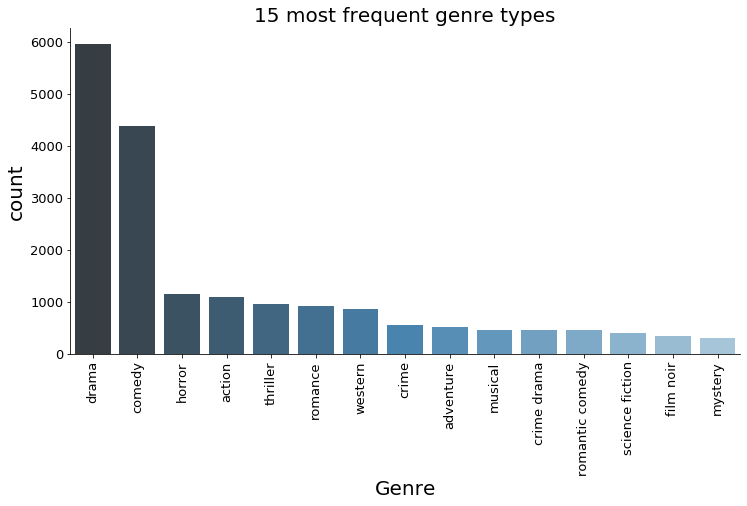

In [20]:
#most frequent genres different than unknown
freq_gen = data[data.Genre != "unknown"]

plt.figure(figsize=(12,6))
plt.title('15 most frequent genre types', fontsize = 20)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
sns.countplot(freq_gen.Genre, order = pd.value_counts(freq_gen.Genre).iloc[:15].index, palette = sns.color_palette("Blues_d", 15))
plt.xticks(size=13, rotation=90)
plt.yticks(size=13)
sns.despine()
plt.show()

In [38]:
# evaluate the performance on training set
# calculate the number of correctly and incorrectly classified examples
print(metrics.confusion_matrix(y_train, text_pipe.predict(X_train)))
# calculate the precision, recall and f1-score
#print(metrics.classification_report(y_train, text_pipe.predict(X_train)))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
